# **Applied Computer Vision: A Structured Workflow from CNNs to Object Detection**

This project illustrates a structured progression in computer vision, starting with image classification using Convolutional Neural Networks on the Fashion MNIST dataset, advancing through preprocessing and augmentation using OpenCV techniques, and culminating in object detection using a pretrained YOLO model, thereby building both theoretical understanding and practical expertise.



---



## **Part 1: Image Classification with CNN (Fashion MNIST)**

Developed a Convolutional Neural Network to classify clothing images into ten categories, demonstrating the fundamentals of deep learning for image recognition.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data size:  (60000, 28, 28) (60000,)
Test data size:  (10000, 28, 28) (10000,)
Output classes :  [0 1 2 3 4 5 6 7 8 9]


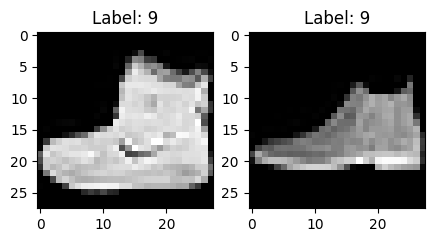

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        62,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,050 (246.29 KB)

 Trainable params: 63,050 (246.29 KB)

 Non-trainable params: 0 (0.00 B)

750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7655 - loss: 0.6886 - val_accuracy: 0.8662 - val_loss: 0.3819
Test loss: 0.3813067376613617
Test accuracy: 0.870199978351593
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1000
           1       0.94      0.98      0.96      1000
           2       0.83      0.76      0.80      1000
           3       0.92      0.83      0.87      1000
           4       0.77      0.84      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.67      0.62      0.64      1000
           7       0.94      0.92      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



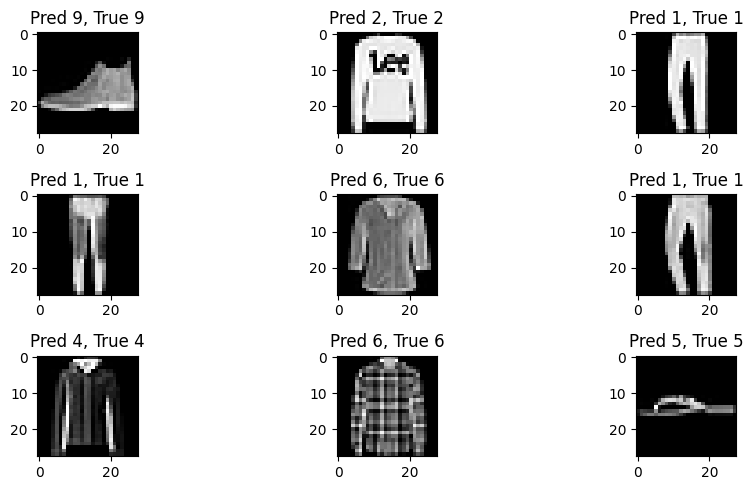

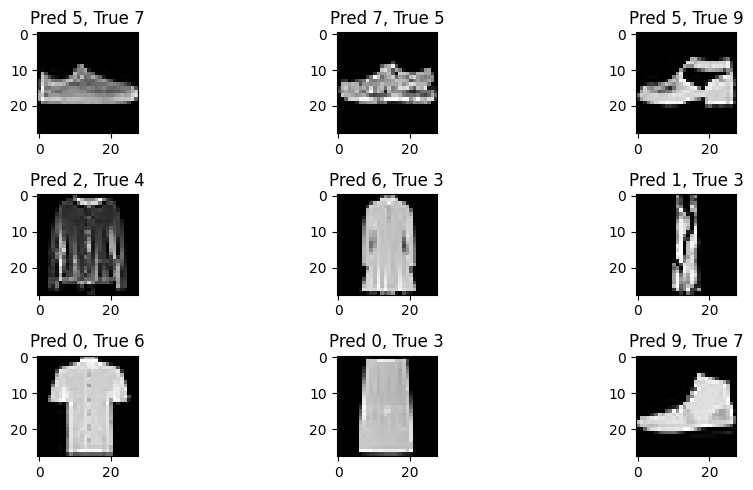

In [1]:
# --- Load Libraries ---
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LeakyReLU

# --- Load Dataset ---
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print('Training data size: ', train_X.shape, train_Y.shape)
print('Test data size: ', test_X.shape, test_Y.shape)

classes = np.unique(train_Y)
print('Output classes : ', classes)

# --- Visualise Example Images ---
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[0], cmap='gray')
plt.title(f"Label: {train_Y[0]}")

plt.subplot(122)
plt.imshow(test_X[0], cmap='gray')
plt.title(f"Label: {test_Y[0]}")
plt.show()

# --- Preprocessing ---
train_X = train_X.reshape(-1, 28,28,1).astype('float32') / 255.
test_X  = test_X.reshape(-1, 28,28,1).astype('float32') / 255.

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot  = to_categorical(test_Y)

train_X, valid_X, train_label, valid_label = train_test_split(
    train_X, train_Y_one_hot, test_size=0.2, random_state=13
)

# --- Build CNN Model ---
fashion_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='linear', padding='same', input_shape=(28,28,1)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2,2), padding='same'),
    Flatten(),
    Dense(10, activation='softmax')
])

fashion_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

fashion_model.summary()

# --- Train Model ---
fashion_train = fashion_model.fit(
    train_X, train_label,
    batch_size=64,
    epochs=1,
    verbose=1,
    validation_data=(valid_X, valid_label)
)

# --- Evaluate Model ---
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# --- Classification Report ---
Y_pred = fashion_model.predict(test_X)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(test_Y, y_pred))

# --- Visualise Correct Predictions ---
correct = np.where(test_Y == y_pred)[0]
plt.figure(figsize=(10,5))
for i, idx in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[idx].reshape(28,28), cmap='gray')
    plt.title(f"Pred {y_pred[idx]}, True {test_Y[idx]}")
plt.tight_layout()
plt.show()

# --- Visualise Incorrect Predictions ---
incorrect = np.where(test_Y != y_pred)[0]
plt.figure(figsize=(10,5))
for i, idx in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[idx].reshape(28,28), cmap='gray')
    plt.title(f"Pred {y_pred[idx]}, True {test_Y[idx]}")
plt.tight_layout()
plt.show()




---



## **Part 2: Image Preprocessing and Augmentation (OpenCV)**

Implemented key image transformations such as resizing, rotation, blurring, and edge detection to enhance data quality and support model generalisation.

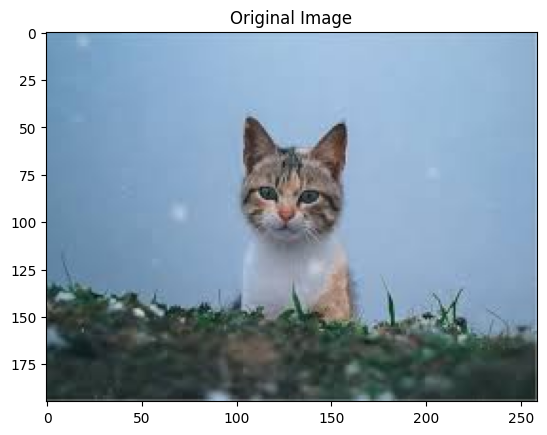

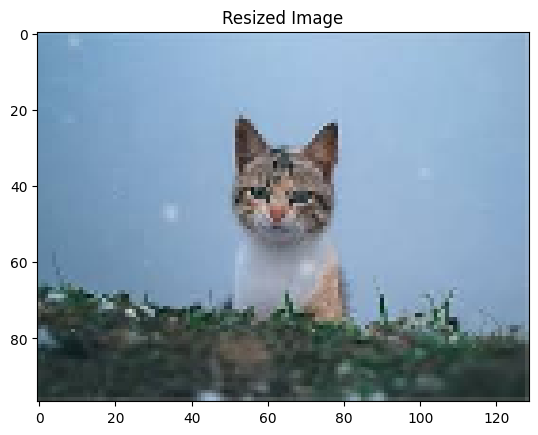

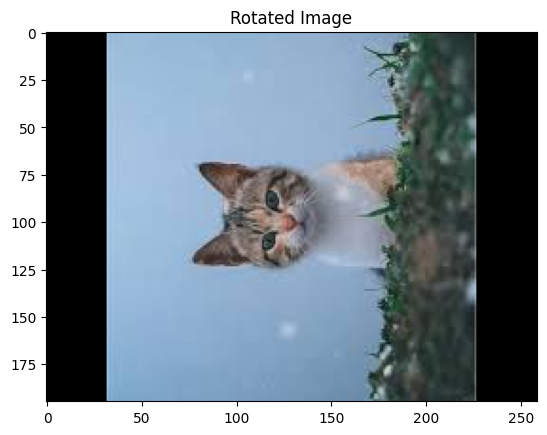

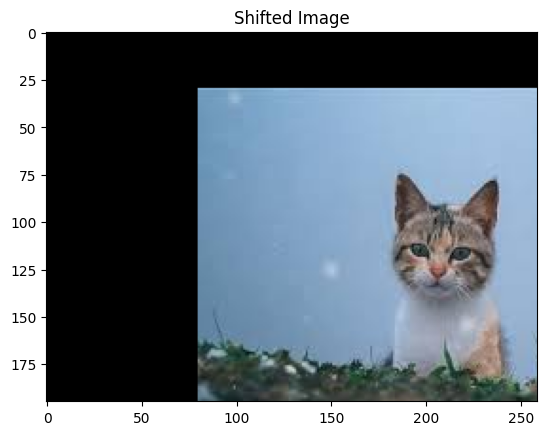

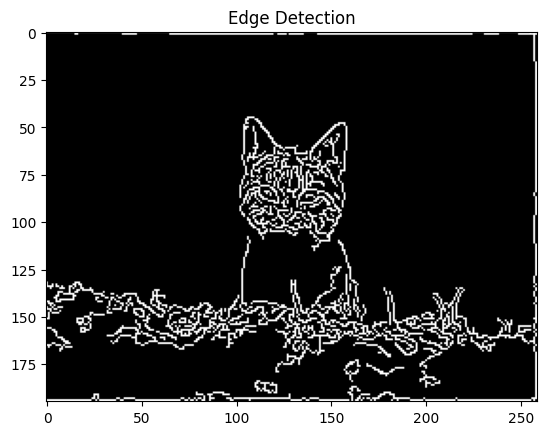

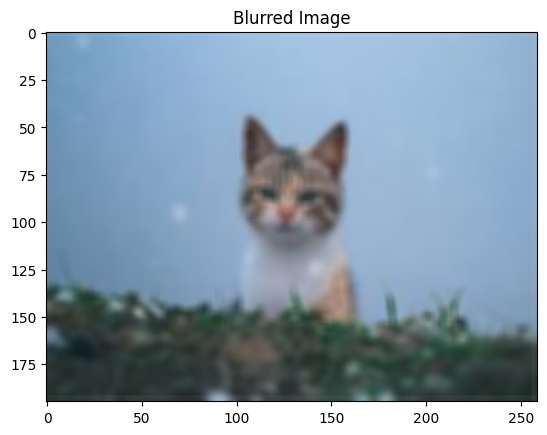

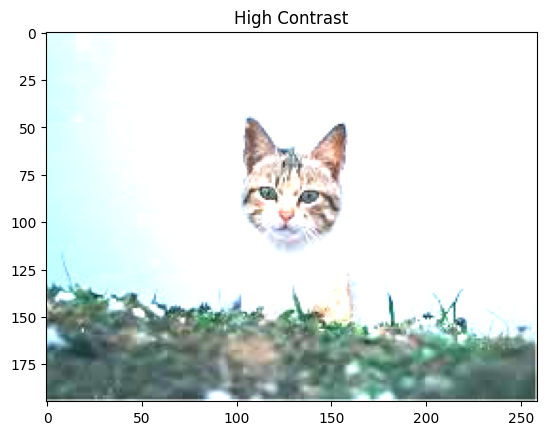

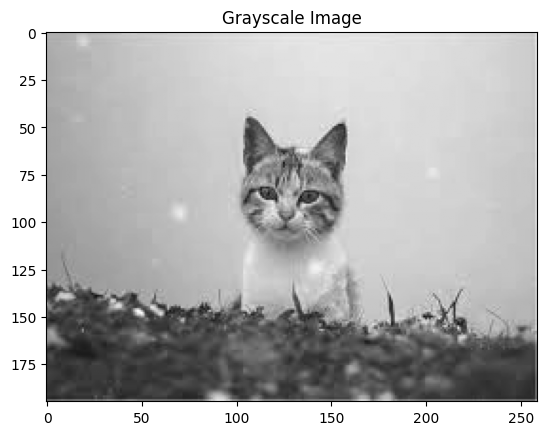

Grayscale image saved as output.jpg


In [5]:
import cv2

# --- Load Image ---
filename = '/content/drive/MyDrive/images.jpeg'
img = cv2.imread(filename)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# --- Resize ---
(heigh, width) = img.shape[:2]
res = cv2.resize(img, (int(width/2), int(heigh/2)), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.show()

# --- Rotation ---
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
res = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.show()

# --- Shifting ---
M = np.float32([[1,0,80],[0,1,30]])
res = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("Shifted Image")
plt.show()

# --- Edge Detection ---
res = cv2.Canny(img, 50, 200)
plt.imshow(res, cmap='gray')
plt.title("Edge Detection")
plt.show()

# --- Blur ---
kernel = np.ones((5,5), np.float32)/25
res = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("Blurred Image")
plt.show()

# --- Contrast ---
res = cv2.addWeighted(img, 2, np.zeros(img.shape, img.dtype), 0, 0)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("High Contrast")
plt.show()

# --- Grayscale ---
res = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(res, cmap='gray')
plt.title("Grayscale Image")
plt.show()

# --- Save Image ---
cv2.imwrite('output.jpg', res)
print("Grayscale image saved as output.jpg")


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



## **Part 3: Object Detection with Pretrained Model (TensorFlow Hub)**

Applied a pretrained object detection model to identify and label multiple objects in real-world images, showcasing the power of transfer learning.

2.19.0
0.16.1
GPU Available: []
Image downloaded to /tmp/tmpybmaxp44.jpg.


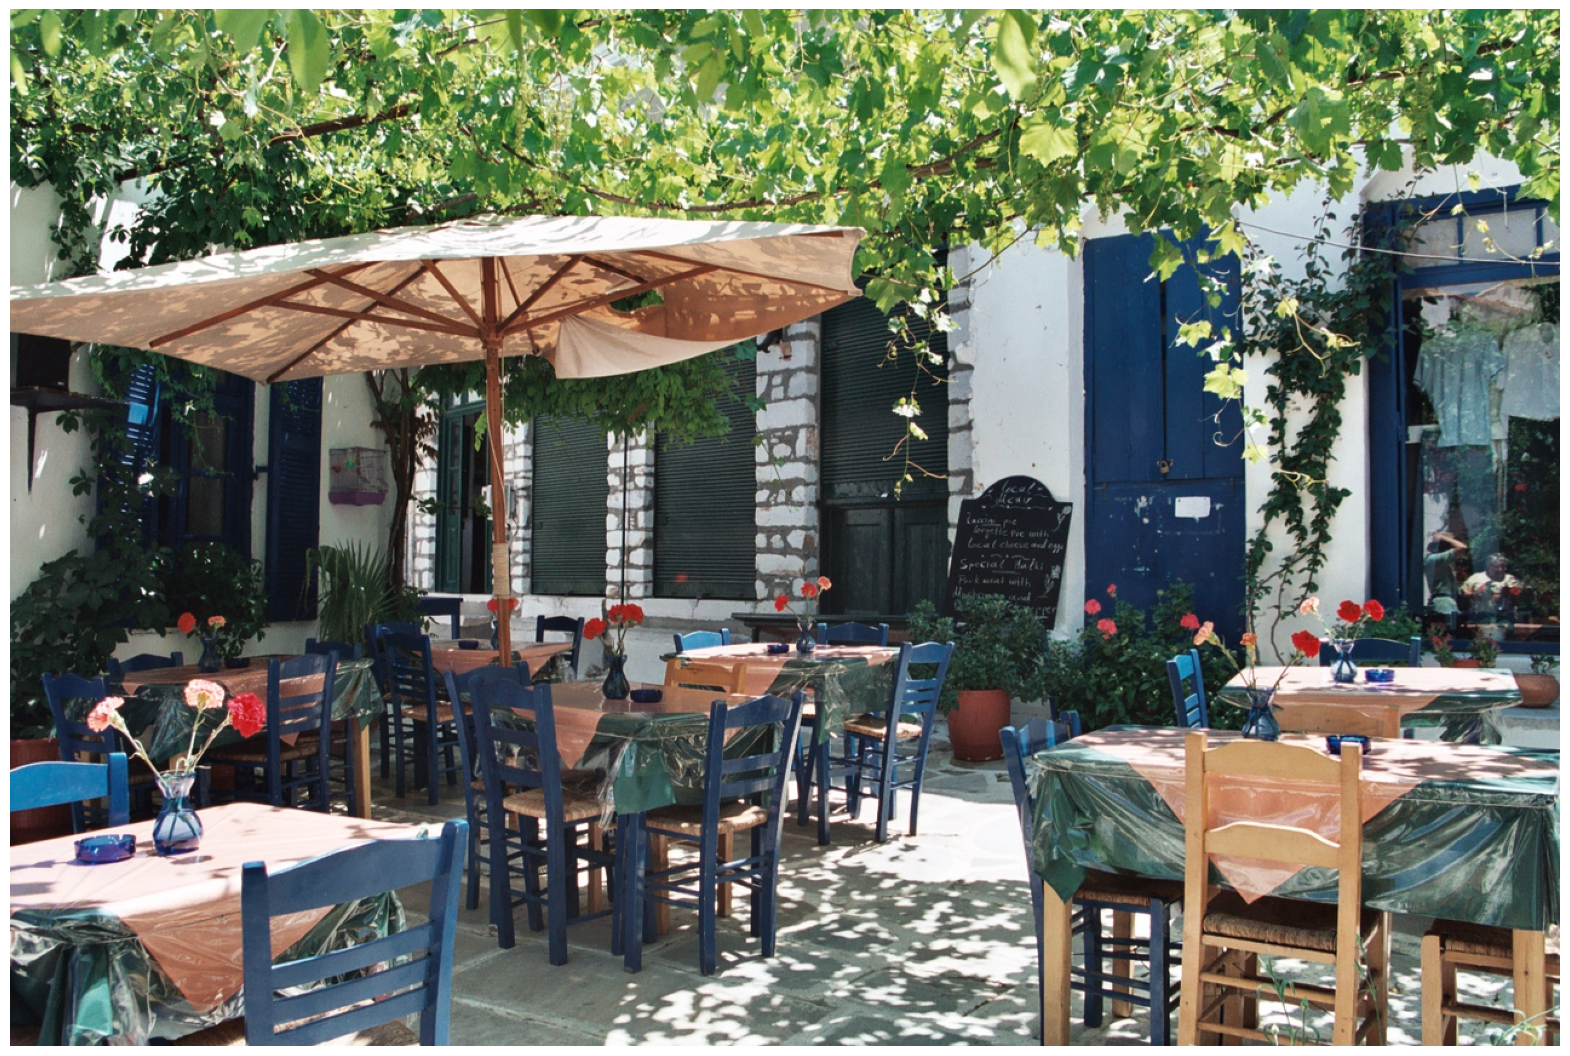

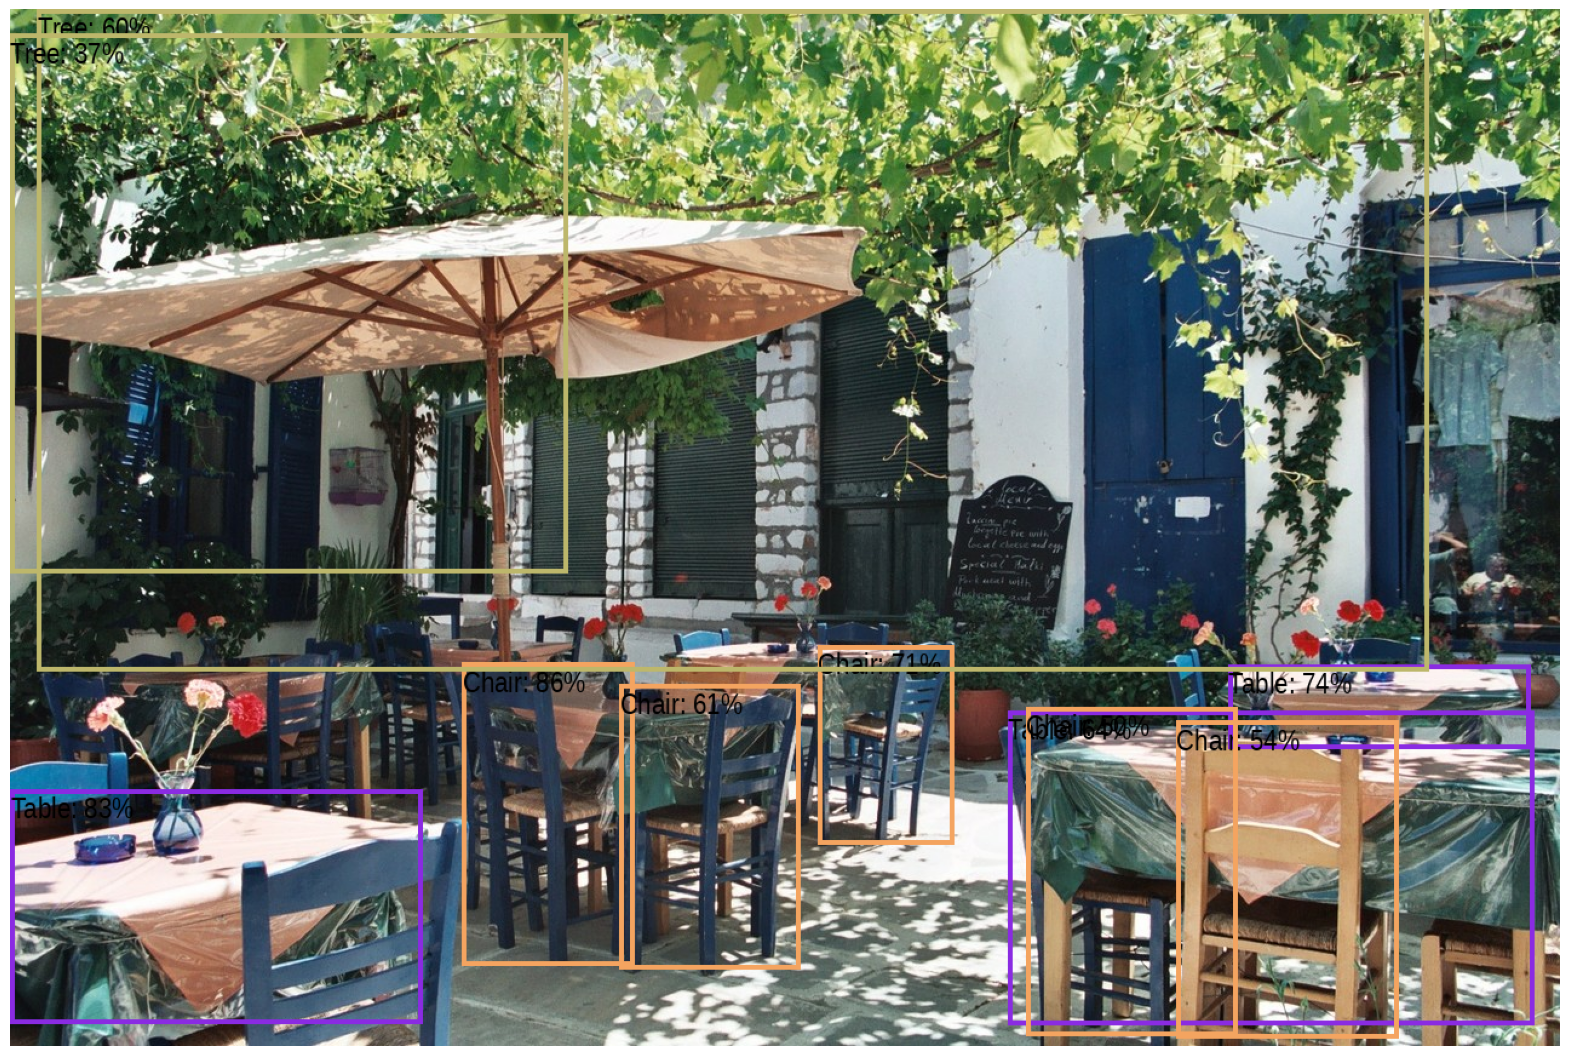

In [6]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import tempfile
from six.moves import urllib
from six import BytesIO
from PIL import Image, ImageColor, ImageDraw, ImageFont, ImageOps
import time

print(tf.__version__)
print(hub.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# --- Helper Functions ---
def display_image(image):
    plt.figure(figsize=(20,15))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def download_and_resize_image(url, new_width=256, new_height=256, display=False):
    import urllib.request
    req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    response = urllib.request.urlopen(req)

    image_data = response.read()
    image_data = BytesIO(image_data)
    pil_image = Image.open(image_data)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.LANCZOS)
    pil_image_rgb = pil_image.convert("RGB")

    _, filename = tempfile.mkstemp(suffix=".jpg")
    pil_image_rgb.save(filename, format="JPEG", quality=90)

    print("Image downloaded to %s." % filename)
    if display:
        display_image(pil_image)
    return filename


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
    colors = list(ImageColor.colormap.values())
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf", 25)
    except IOError:
        font = ImageFont.load_default()

    for i in range(min(boxes.shape[0], max_boxes)):
        if scores[i] >= min_score:
            ymin, xmin, ymax, xmax = tuple(boxes[i])
            display_str = "{}: {}%".format(class_names[i].decode("ascii"), int(100*scores[i]))
            color = colors[hash(class_names[i]) % len(colors)]
            image_pil = Image.fromarray(np.uint8(image)).convert('RGB')
            draw = ImageDraw.Draw(image_pil)
            im_height, im_width, _ = image.shape  # Access dimensions from numpy array shape
            (left, right, top, bottom) = (xmin*im_width, xmax*im_width, ymin*im_height, ymax*im_height)
            draw.rectangle([(left, top), (right, bottom)], outline=color, width=4)
            draw.text((left, top), display_str, fill="black", font=font)
            np.copyto(image, np.array(image_pil))
    return image

# --- Download Test Image ---
image_url = "https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

# --- Load Pretrained Model ---
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector = hub.load(module_handle).signatures['default']

# --- Run Detection ---
def run_detector(detector, path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    result = detector(converted_img)
    result = {key:value.numpy() for key,value in result.items()}
    image_with_boxes = draw_boxes(img.numpy(), result["detection_boxes"],
                                  result["detection_class_entities"], result["detection_scores"])
    display_image(image_with_boxes)

run_detector(detector, downloaded_image_path)